Reference:

- Data source:
    <https://data.worldbank.org/topic/climate-change?end=2018&start=1973>
- Custom scatterplot colors with colorbar in Matplotlib:
    <https://www.robotswillkillusall.org/posts/mpl-scatterplot-colorbar.html>
- Legend guide
    <https://matplotlib.org/users/legend_guide.html>
- Greenhouse gas
    <https://en.wikipedia.org/wiki/Greenhouse_gas>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
# from jupyterthemes import jtplot

In [2]:
climate_1960_2018 = pd.read_csv('datasets/climate_1960_2018.csv')
climate_1960_2018.drop(columns='Unnamed: 63', inplace=True)

In [3]:
climate_1960_2018.shape

(20064, 63)

In [4]:
indicators = ['Forest area (% of land area)',
              'Forest area (sq. km)']

forest_1960_2018 = climate_1960_2018[climate_1960_2018['Indicator Name'].isin(indicators)]
forest_1960_2018.fillna(0, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [5]:
forest_1960_2018.drop(columns=['Country Code', 'Indicator Code'], inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
def df_4each_indicator(glb_df, indicator):
    df = glb_df[glb_df['Indicator Name'] == indicator]
    df.index = df['Country Name']
    df.drop(columns=['Country Name', 'Indicator Name'], inplace=True)
    df = df.T
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
    return df

In [7]:
forest_areaPct_1960_2018 = df_4each_indicator(forest_1960_2018,
                                              'Forest area (% of land area)')
forest_areaSQ_1960_2018 = df_4each_indicator(forest_1960_2018,
                                             'Forest area (sq. km)')

In [8]:
def millions_0dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.0f' % (x * 1e-6)

FORMATTER_MILLIONS_0DEC = FuncFormatter(millions_0dec)

## Forest area (sq. km) & Forest area (% of land area)

In [9]:
forest_areaSQ_pos = forest_areaSQ_1960_2018[forest_areaSQ_1960_2018['World'] > 0]
forest_areaPct_pos = forest_areaPct_1960_2018[forest_areaPct_1960_2018['World'] > 0]

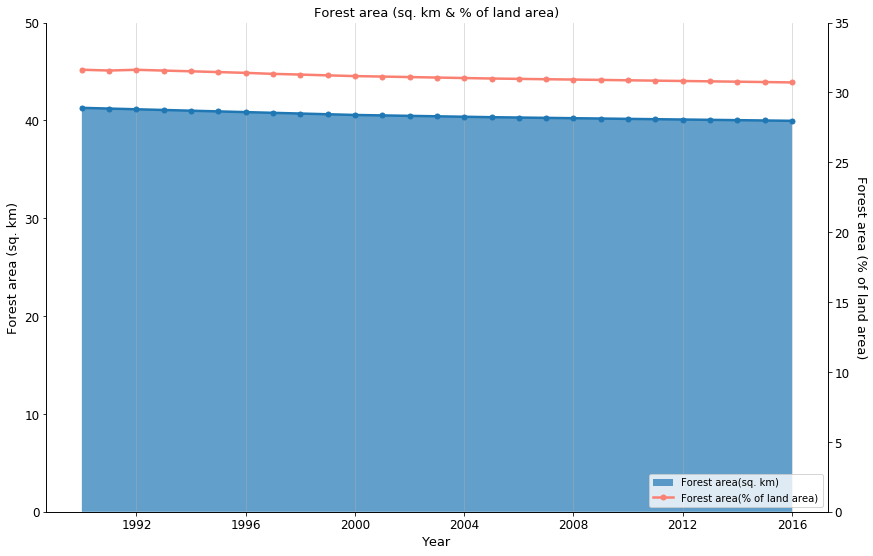

In [10]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(14, 9))
axarr.set_title('Forest area (sq. km & % of land area)', fontdict={'fontsize': 13})

bar_tot = axarr.fill_between(forest_areaSQ_pos.index,
                             forest_areaSQ_pos['World'],
                             alpha=0.7)

axarr.plot(forest_areaSQ_pos.index,
           forest_areaSQ_pos['World'],
           linewidth=2.5,
           marker='.',
           markersize=10)


axarr_02 = axarr.twinx()
line_pct, = axarr_02.plot(forest_areaPct_pos.index,
                          forest_areaPct_pos['World'],
                          color='salmon',
                          linewidth=2.5,
                          marker='.',
                          markersize=10)

axarr.tick_params(axis='both', labelsize=12)
axarr.set_xlabel('Year', size=13)
axarr.set_ylabel('Forest area (sq. km)', size=13)
axarr.set_ylim(bottom=0, top=50000000)
axarr.yaxis.set_major_formatter(FORMATTER_MILLIONS_0DEC)
axarr.spines['top'].set_visible(False)
axarr.grid(alpha=0.5, axis='x')

axarr_02.tick_params(axis='both', labelsize=12)
axarr_02.set_ylabel('Forest area (% of land area)', rotation=270, labelpad=17, size=13)
axarr_02.set_ylim(bottom=0, top=35)
axarr_02.spines['top'].set_visible(False)
axarr_02.legend(handles=(bar_tot, line_pct),
                labels=('Forest area(sq. km)', 'Forest area(% of land area)'), loc=4)

plt.show()
# plt.savefig('forest-area.png', bbox_inches='tight')

<https://www.thoughtco.com/maps-of-the-worlds-forests-1343036><br>
Forests cover some 3.9 billion hectares (or 9.6 billion acres) which is approximately 30% of the world's land surface. According to the graph above, we find that from 1990 to 2016, the world's forest area decreases 3% (41282694.9 - 39958245.9 = 1324449 sq. km).

### Map

In [11]:
not_ctry_list = ['World', 'Post-demographic dividend', 'OECD members', 'High income', 'North America',
                 'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Not classified',
                 'Low income', 'Lower middle income', 'Low & middle income', 'Late-demographic dividend',
                 'Arab World', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend',
                 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia',
                 'Euro area', 'European Union', 'Middle East & North Africa', 'Middle income',
                 'Middle East & North Africa (excluding high income)', 'Pre-demographic dividend',
                 'South Asia', 'Sub-Saharan Africa (excluding high income)',
                 'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)',
                 'Latin America & the Caribbean (IDA & IBRD countries)',
                 'Middle East & North Africa (IDA & IBRD countries)', 'South Asia (IDA & IBRD)',
                 'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income',
                 'Central Europe and the Baltics', 'Latin America & Caribbean (excluding high income)']


In [12]:
import geopandas as gpd

assert 'naturalearth_lowres' in gpd.datasets.available
datapath = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(datapath)
gdf.rename(columns={'name':'Country'}, inplace=True)

gdf['Country'] = gdf['Country'].replace({'United States of America':'United States',
                                         'Bosnia and Herz.':'Bosnia and Herzegovina',
                                         'Central African Rep.':'Central African Republic',
                                         'Congo':'Congo, Rep.',
                                         'Dem. Rep. Congo':'Congo, Dem. Rep.',
                                         'Dominican Rep.':'Dominican Republic',
                                         'Egypt':'Egypt, Arab Rep.',
                                         'Iran':'Iran, Islamic Rep.',
                                         'Kyrgyzstan':'Kyrgyz Republic',
                                         'Russia':'Russian Federation',
                                         'Solomon Is.':'Solomon Islands',
                                         'Brunei':'Brunei Darussalam',
                                         'Czechia':'Czech Republic',
                                         'Eq. Guinea':'Equatorial Guinea',
                                         'S. Sudan':'South Sudan',
                                         'Slovakia':'Slovak Republic',
                                         'Syrian Arab Republic':'Syria',
                                         'Venezuela':'Venezuela, RB',
                                         'Yemen':'Yemen, Rep.',
                                         'eSwatini':'Eswatini'})

In [13]:
forest_areaSQ_pos.rename(columns={'Bahamas, The':'Bahamas',
                                  'Cote d\'Ivoire':'Côte d\'Ivoire',
                                  'Gambia, The':'Gambia',
                                  'Korea, Dem. People’s Rep.':'North Korea',
                                  'Korea, Rep.':'South Korea',
                                  'Lao PDR':'Laos',
                                  'North Macedonia':'Macedonia'}, inplace=True)
forest_areaSQ_hist = forest_areaSQ_pos.drop(columns=not_ctry_list).stack().reset_index().rename(columns={'level_0':'Date',
                                                                                                         'Country Name':'Country',
                                                                                                         0:'Forest_SQ'})
forest_areaSQ_hist = pd.merge(forest_areaSQ_hist, gdf[['Country']], on='Country')
forest_areaSQ_hist.sort_values(['Country', 'Date'], inplace=True)
forest_areaSQ_hist.reset_index(drop=True, inplace=True)
# take only history after 2001
forest_areaSQ_hist = forest_areaSQ_hist[forest_areaSQ_hist.Date > '2001-01-01'].reset_index(drop=True)


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [14]:
gdf_forest_areaSQ_hist = pd.merge(gdf, forest_areaSQ_hist[['Country']], on='Country')
gdf_forest_areaSQ_hist.drop_duplicates(subset=['pop_est', 'continent', 'Country', 'iso_a3', 'gdp_md_est'],
                                       inplace=True)
gdf_forest_areaSQ_hist = gdf_forest_areaSQ_hist.sort_values('Country').reset_index(drop=True)
gdf_forest_areaSQ_hist = gdf_forest_areaSQ_hist[['Country', 'gdp_md_est', 'geometry']]

In [15]:
datetime_index = pd.DatetimeIndex(forest_areaSQ_hist['Date'].unique())

dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = np.array(dt_index_epochs).astype('U10')

In [16]:
styledata = {}

s = 0
e = 15
for i in gdf_forest_areaSQ_hist.index:
    df = pd.DataFrame(
        {'color': np.array(forest_areaSQ_hist.Forest_SQ[s:e]),
         'opacity': np.array([1] * 15)},
        index=dt_index
    )
    styledata[i] = df
    s += 15
    e += 15

In [17]:
max_color = max(forest_areaSQ_hist['Forest_SQ'])
min_color = min(forest_areaSQ_hist['Forest_SQ'])
max_opacity, min_opacity = 1, 1

import branca.colormap as cm

cmap = cm.LinearColormap(
    ['#cf597e', '#ed9c72', '#e9e29c', '#71be83', '#009392'],
    vmin=min_color, vmax=max_color
)

def norm(x):
    return (x - x.min()) / (x.max() - x.min())

for i, data in styledata.items():
    data['color'] = data['color'].map(cmap)
    data['opacity'] = 1

In [18]:
cmap

In [19]:
styledict = {
    str(ctry): data.to_dict(orient='index') for ctry, data in styledata.items()
}

In [20]:
import folium
from folium.plugins import TimeSliderChoropleth

forest_areaSQ_hist_map = folium.Map(location=[0, 0], zoom_start = 1.5, tiles='cartodbpositron')

TimeSliderChoropleth(
    gdf_forest_areaSQ_hist.to_json(),
    styledict=styledict
).add_to(forest_areaSQ_hist_map)

forest_areaSQ_hist_map
# forest_areaSQ_hist_map.save('forest_areaSQ_hist_map.html')

According to the graph above, obviously, Russia's forest is largest than other countries in the world. The top 5 countries in terms of forest area are Russia, Brezil, Canada, United States and China; especially for China, its forest area increases 14.4% (264456 square km) from 2002 to 2016. In the following, I'll introduce forest's distribution over the world.

<https://www.thoughtco.com/maps-of-the-worlds-forests-1343036><br>
Africa's forest cover is estimated at 650 million hectares or 17 percent of the world's forests. The major forest types are dry tropical forests in the Sahel, Eastern and Southern Africa, moist tropical forests in Western and Central Africa, subtropical forest and woodlands in Northern Africa, and mangroves in coastal zones of the southern tip.

Asia and the Pacific region accounts for 18.8 percent of global forests. Northwest Pacific and East Asia has the largest forest area followed by Southeast Asia, Australia and New Zealand, South Asia, South Pacific and Central Asia.

Europe's 1 million hectares of forests comprise 27 percent of the world's total forested area and cover 45 percent of the European landscape. A wide variety of boreal, temperate and sub-tropical forest types are represented, as well as tundra and montane formations.

Forests cover about 26 percent of North America's land area and represent more than 12 percent of the world's forests. The United States is the fourth most forested country in the world with 226 million hectares. Canada's forest area has not grown during the past decade but forests in the United States have increased by almost 3.9 million hectares. Forests and woodlands of West Asia occupy only 3.66 million hectares or 1 percent of the region's land area and account for less than 0.1 percent of the world's total forested area.

Latin America and the Caribbean are some of the world's most important forest regions, with nearly one-quarter of the world's forest cover. The region contains 834 million hectares of tropical forest and 130 million hectares of other forests.

<https://edition.cnn.com/2019/08/22/world/amazon-rainforest-environment-fire-trnd/index.html><br>
However, the Amazon rainforest has been on fire for the past month, it's home to at least 10% of the world's biodiversity, produces 20% of the world's oxygen and helps regulate the temperature of the whole planet. The Amazon is a giant carbon sink. If it burns, that carbon will all go into the atmosphere. Before the fires, land conversion and deforestation made the Amazon release up to 0.5 billion metric tons of carbon per year. According to the WWF, depending on the damage from these fires, that release would increase, accelerating climate change even further.
